<a href="https://colab.research.google.com/github/dianaquinterol/MujeresDigitales/blob/main/Taller_semana_5_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diana Soraya Quintero Lopez

Un fanático de pokemones le pide analizar los datos de pokemones, para esto se le proporciona un conjunto de datos en archivo csv. Este fanático le pide a usted como analista investigar cuales son los pokemones con mayor ataque.

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
from scipy import stats


In [28]:
df = pd.read_csv('pokemon_data.csv')
df.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


Ejercicio 1:
Calcule el promedio y la mediana del ataque de:

1.Todos los pokemones                                                             
2.Los pokemones agrupados por Legendary (es decir el promedio y mediana de
 pokemones legendarios y no legendarios)
 
 3.Los pokemones agrupados por Type 1

In [29]:
df['Attack'].mean()#promedio de todos los pokemones


79.00125

In [30]:
df['Attack'].median()#mediana de todos los pokemones

75.0

In [31]:
df.groupby('Legendary')['Attack'].mean()#promedio de Attack legendary false y legendary True

Legendary
False     75.669388
True     116.676923
Name: Attack, dtype: float64

In [32]:
df.groupby('Legendary')['Attack'].median()#mediana de Attack legendary false y legendary True

Legendary
False     72
True     110
Name: Attack, dtype: int64

In [33]:
df.groupby("Type 1")["Attack"].mean() #agrupó por Type 1 y le saco el promedio a la columna Attack

Type 1
Bug          70.971014
Dark         88.387097
Dragon      112.125000
Electric     69.090909
Fairy        61.529412
Fighting     96.777778
Fire         84.769231
Flying       78.750000
Ghost        73.781250
Grass        73.214286
Ground       95.750000
Ice          72.750000
Normal       73.469388
Poison       74.678571
Psychic      71.456140
Rock         92.863636
Steel        92.703704
Water        74.151786
Name: Attack, dtype: float64

In [34]:
df.groupby("Type 1")["Attack"].median()#agrupó por Type 1 y le saco la mediana a la columna Attack

Type 1
Bug          65.0
Dark         88.0
Dragon      113.5
Electric     65.0
Fairy        52.0
Fighting    100.0
Fire         84.5
Flying       85.0
Ghost        66.0
Grass        70.0
Ground       85.0
Ice          67.0
Normal       70.5
Poison       74.0
Psychic      57.0
Rock         95.0
Steel        89.0
Water        72.0
Name: Attack, dtype: float64

# Ejercicio 2:
Grafique el ataque de los pokemones con un grafico boxplot para los siguientes casos:

1.Todos los pokemones                                                                        
2.Los pokemones agrupados por Legendary (es decir el promedio y mediana de pokemones legendarios y no legendarios)                                           
3.Los pokemones agrupados por Type 1

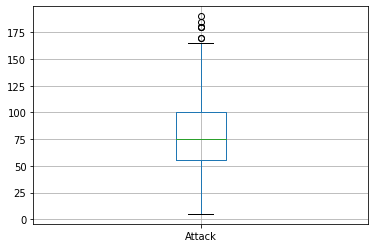

In [35]:
df.boxplot('Attack') #ataque todos los pokemones

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


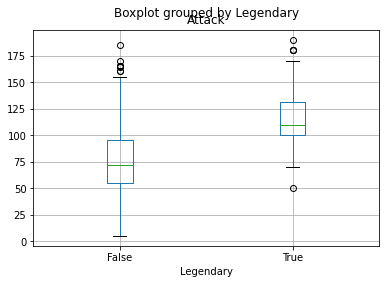

In [36]:
df.boxplot('Attack','Legendary') #promedio y mediana de pokemones legendarios y no legendarios

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


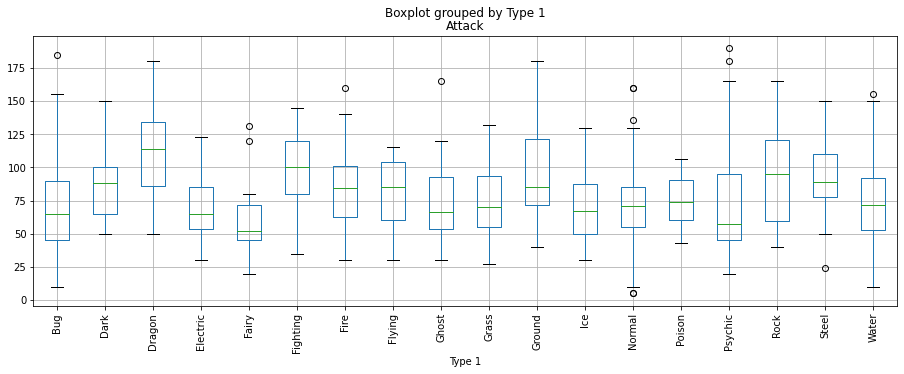

In [37]:
df.boxplot('Attack','Type 1', grid=True, rot=90, figsize=(15,5), fontsize=10) #Los pokemones agrupados por Type 1

## Ejercicio 3:

Realice las siguientes pruebas de hipótesis:
1. El promedio del ataque de los pokemones es mayor a 77
2. El promedio del ataque de los pokemones legendarios es diferente a los no legendarios


Y determine con un nivel de significancia del 5% (es decir $\alpha$ = 0.05), si podemos rechazar o no las 3 hipótesis anteriores. 

In [38]:
stats.ttest_1samp(df['Attack'],popmean=77) #p> 0.05

Ttest_1sampResult(statistic=1.7439461372672926, pvalue=0.08155305645189834)

In [40]:
legend=df[df.Legendary==True].Attack
no_legend=df[df.Legendary==False].Attack
statistic, pvalue=stats.ttest_ind(legend,no_legend,equal_var=False)
statistic, pvalue

(10.438133539322203, 2.520372449236646e-16)